# Explore here

In [18]:
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv", sep = ";")


#EDA

df.head()
df.shape    





#Eliminacion de los duplicados
duplicados = df.duplicated()
num_duplicados = duplicados.sum()

df_duplicados = df[duplicados]

df_sin_duplicados = df.drop_duplicates()

#Eliminar variables que no afecten a la decision

df.drop(["contact", "month", "day_of_week", "pdays"], axis = 1, inplace = True)

df.head()


#Ver si existen valores nulos en el df
df.isnull().sum()


#Ver los tipos de datos (7 numéricos y 8 categóricos)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   duration        41188 non-null  int64  
 8   campaign        41188 non-null  int64  
 9   previous        41188 non-null  int64  
 10  poutcome        41188 non-null  object 
 11  emp.var.rate    41188 non-null  float64
 12  cons.price.idx  41188 non-null  float64
 13  cons.conf.idx   41188 non-null  float64
 14  euribor3m       41188 non-null  float64
 15  nr.employed     41188 non-null  float64
 16  y               41188 non-null  object 
dtypes: float64(5), int64(4), object

marital
married     24928
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64
education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: count, dtype: int64
loan
no         33950
yes         6248
unknown      990
Name: count, dtype: int64


/tmp/ipykernel_832/3224144208.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axis[0], data=df, x="marital", palette="pastel")
/tmp/ipykernel_832/3224144208.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axis[1], data=df, x="education", palette="pastel")


/tmp/ipykernel_832/3224144208.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axis[2], data=df, x="loan", palette="pastel")


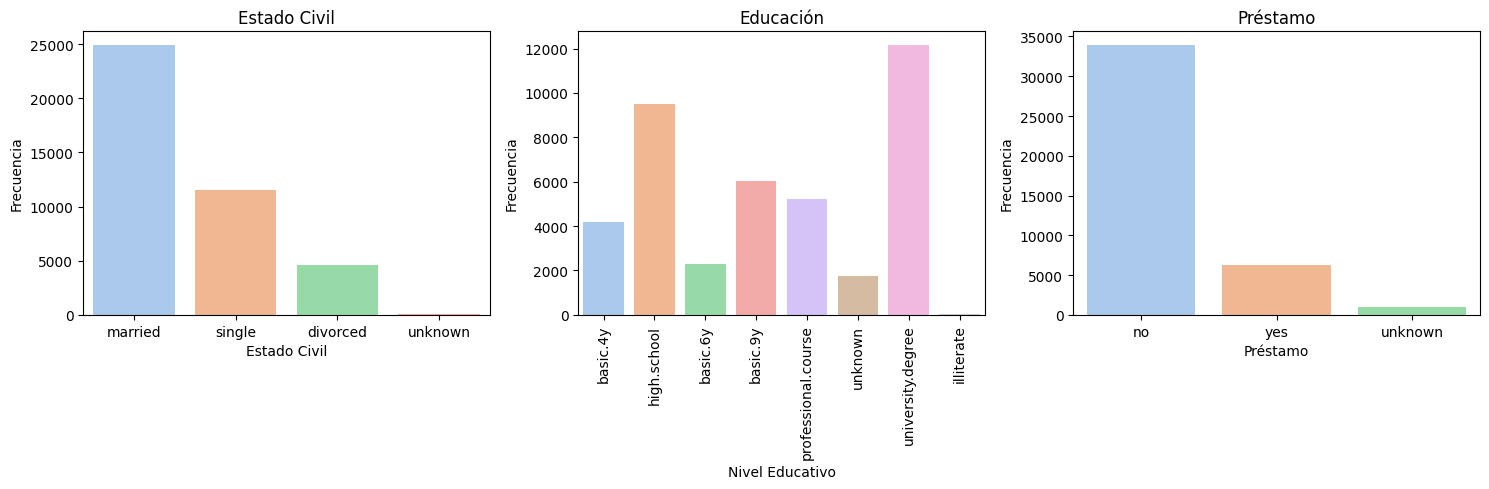

In [19]:
#Analisis Univariante/Categóricos


#Estado civil
print(df.marital.value_counts())

#Educacion
print(df.education.value_counts())

#Prestamo
print(df.loan.value_counts())


# Representación gráfica
fig, axis = plt.subplots(1, 3, figsize=(15, 5))  # Aumentamos el tamaño de la figura para tres gráficos

# Gráfico para "Estado civil"
sns.countplot(ax=axis[0], data=df, x="marital", palette="pastel")
axis[0].set_title("Estado Civil")
axis[0].set_xlabel("Estado Civil")
axis[0].set_ylabel("Frecuencia")

# Gráfico para "Educación"
sns.countplot(ax=axis[1], data=df, x="education", palette="pastel")
axis[1].set_title("Educación")
axis[1].set_xlabel("Nivel Educativo")
axis[1].set_ylabel("Frecuencia")
axis[1].tick_params(axis='x', rotation=90)  # Rotar las etiquetas en el eje x

# Gráfico para "Préstamo"
sns.countplot(ax=axis[2], data=df, x="loan", palette="pastel")
axis[2].set_title("Préstamo")
axis[2].set_xlabel("Préstamo")
axis[2].set_ylabel("Frecuencia")

# Ajustar el diseño de la figura
plt.tight_layout()

# Mostrar el plot
plt.show()





Algo más del 50% de nuestra población esta casada
Aproximadamente el 25% tiene formacion universitaria
Un 70% no tiene préstamo activo con la entidad

In [20]:
#Analisis Univariante/numéricos
#Edad
#Empleo
#Tasa de variación del empleo
#Índice de confianza



# Crear una figura y ejes para un layout 2x3
#fig, axis = plt.subplots(2, 3, figsize=(12, 8))

# Histograma y diagrama de caja para "Euribor"
#sns.kdeplot(ax=axis[0], data=df, x="euribor3m", fill=True, color="skyblue")
#axis[0].set_title("Línea de densidad: Euribor")
#axis[0].set_xlabel("Euribor")
#axis[0].set_ylabel("Densidad")

#sns.boxplot(ax=axis[1], data=df, x="euribor3m", color="lightgreen")
#sns.boxplot(ax=axis[1], data=df, x="euribor3m", color="lightgreen")


# Histograma y diagrama de caja para "Age"
#sns.histplot(ax=axis[0, 1], data=df, x="age").set(xlabel=None, ylabel=None, title="Histograma: Age")
#sns.boxplot(ax=axis[1, 1], data=df, x="age")
#axis[1, 1].set_title("Diagrama de caja: Age")

# Histograma y diagrama de caja para "Indice de confianza"
#sns.histplot(ax=axis[0, 2], data=df, x="cons.conf.idx").set(xlabel=None, ylabel=None, title="Histograma: Indice de confianza")
#sns.boxplot(ax=axis[2, 1], data=df, x="cons.conf.idx")
#axis[1, 1].set_title("Diagrama de caja: Indice de confianza")

# Ajustar el layout
#plt.tight_layout()

# Mostrar el plot
#plt.show()





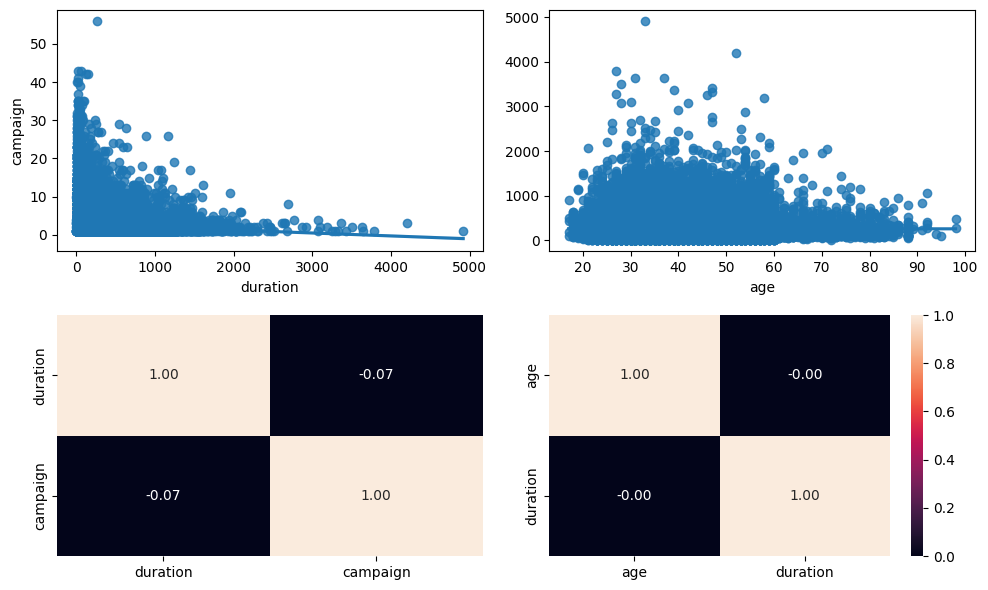

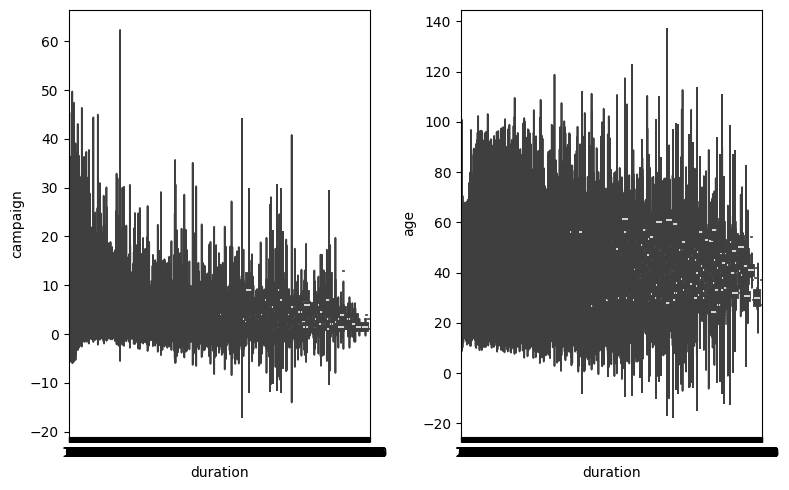

In [21]:
#Análisis multivariante

#Age, duration y campaign

A = "duration"
B = "campaign"
C = "age"



fig, axis = plt.subplots(2, 2, figsize = (10, 6))

# Crear un diagrama de dispersión múltiple
sns.regplot(ax = axis[0, 0], data = df, x = A , y = B)
sns.heatmap(df[["duration", "campaign"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(ax = axis[0, 1], data = df, x = C, y = A).set(ylabel=None)
sns.heatmap(df[["age", "duration"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()



fig, axis = plt.subplots(1, 2, figsize = (8, 5))

sns.violinplot(ax = axis[0], x=A, y=B, data=df)
sns.violinplot(ax = axis[1], x=A, y=C, data=df)

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()



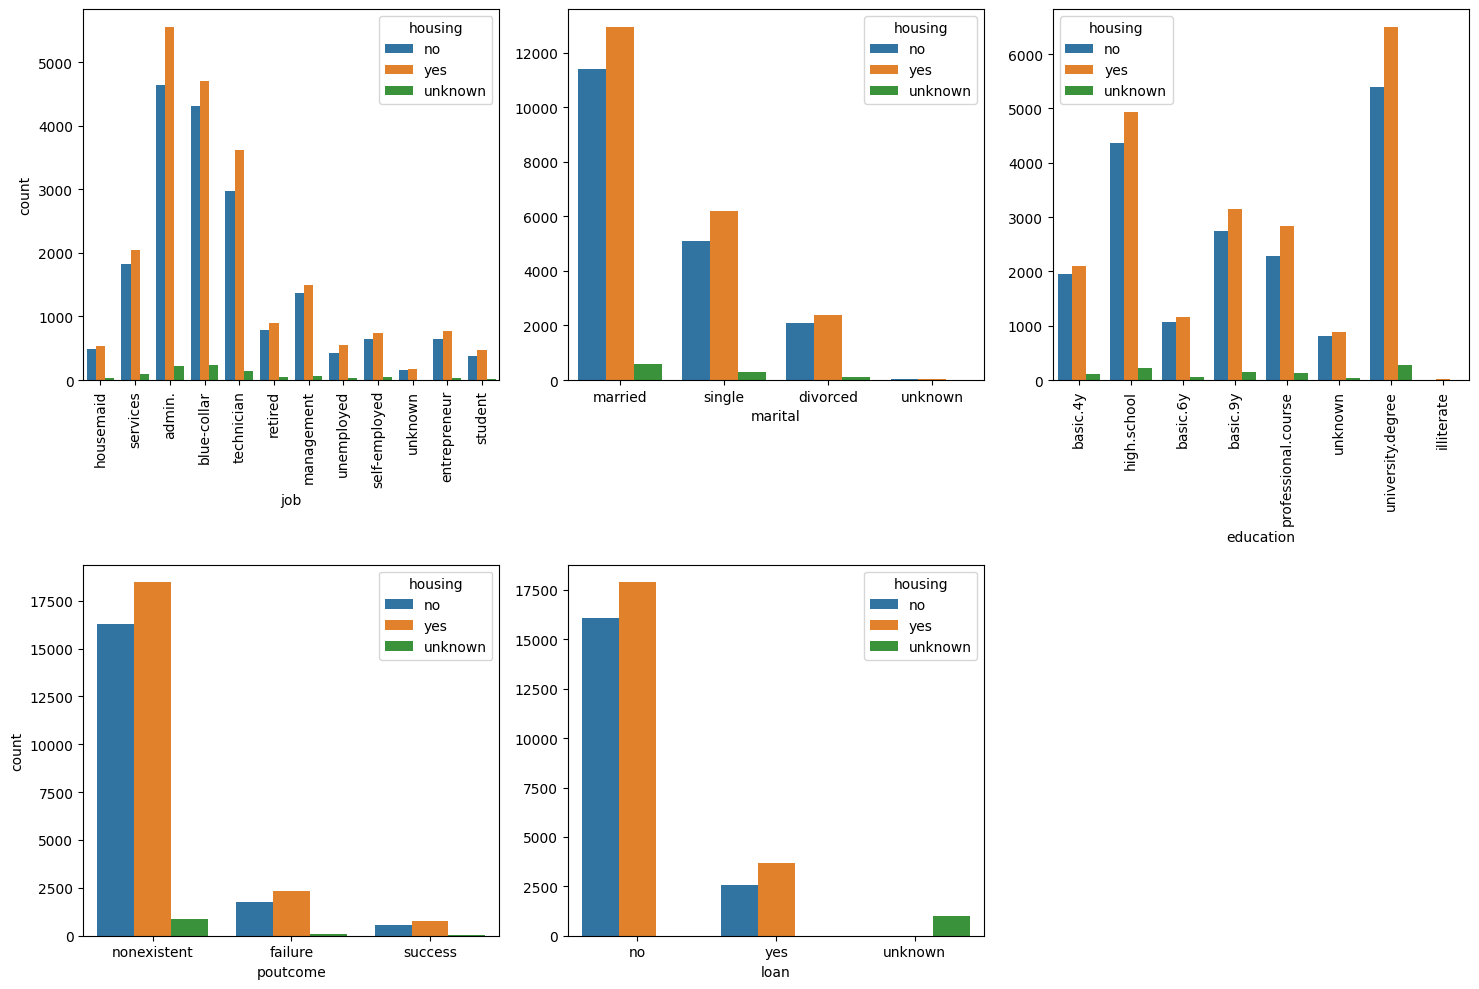

In [22]:
#Análisis categórico-categórico

D = "housing"


fig, axis = plt.subplots(2, 3, figsize = (15, 10))

sns.countplot(ax = axis[0, 0], data = df, x = "job", hue = D)
axis[0, 0].tick_params(axis='x', rotation=90)  # Rotar las etiquetas en el eje x
sns.countplot(ax = axis[0, 1], data = df, x = "marital", hue = D).set(ylabel = None)
sns.countplot(ax = axis[0, 2], data = df, x = "education", hue = D).set(ylabel = None)
axis[0, 2].tick_params(axis='x', rotation=90)  # Rotar las etiquetas en el eje x
sns.countplot(ax = axis[1, 0], data = df, x = "poutcome", hue = D)
sns.countplot(ax = axis[1, 1], data = df, x = "loan", hue = D).set(ylabel = None)

plt.tight_layout()
fig.delaxes(axis[1, 2])

plt.show()



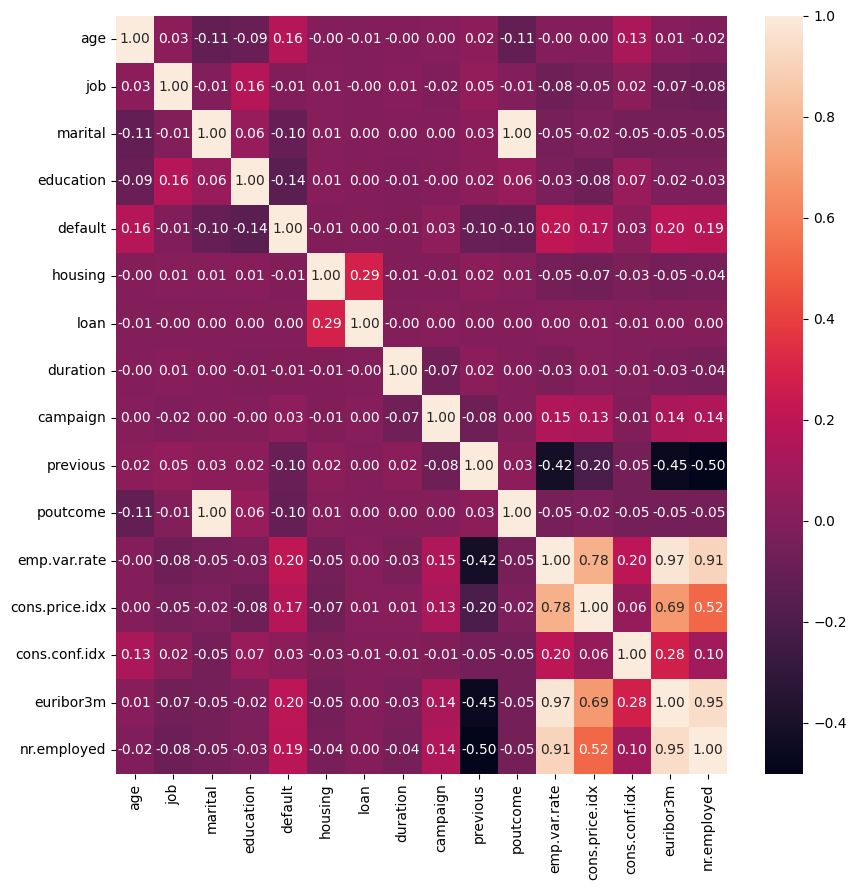

In [23]:
#Análisis de correlaciones

df["job"] = pd.factorize(df["job"])[0]
df["marital"] = pd.factorize(df["marital"])[0]
df["education"] = pd.factorize(df["education"])[0]
df["default"] = pd.factorize(df["default"])[0]
df["housing"] = pd.factorize(df["housing"])[0]
df["loan"] = pd.factorize(df["loan"])[0]
df["poutcome"] = pd.factorize(df["marital"])[0]


fig, axis = plt.subplots(figsize = (9, 9))

sns.heatmap(df[["age", "job", "marital", "education", "default", "housing", "loan", 
                 "duration", "campaign", "previous", "poutcome", "emp.var.rate", 
                 "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()







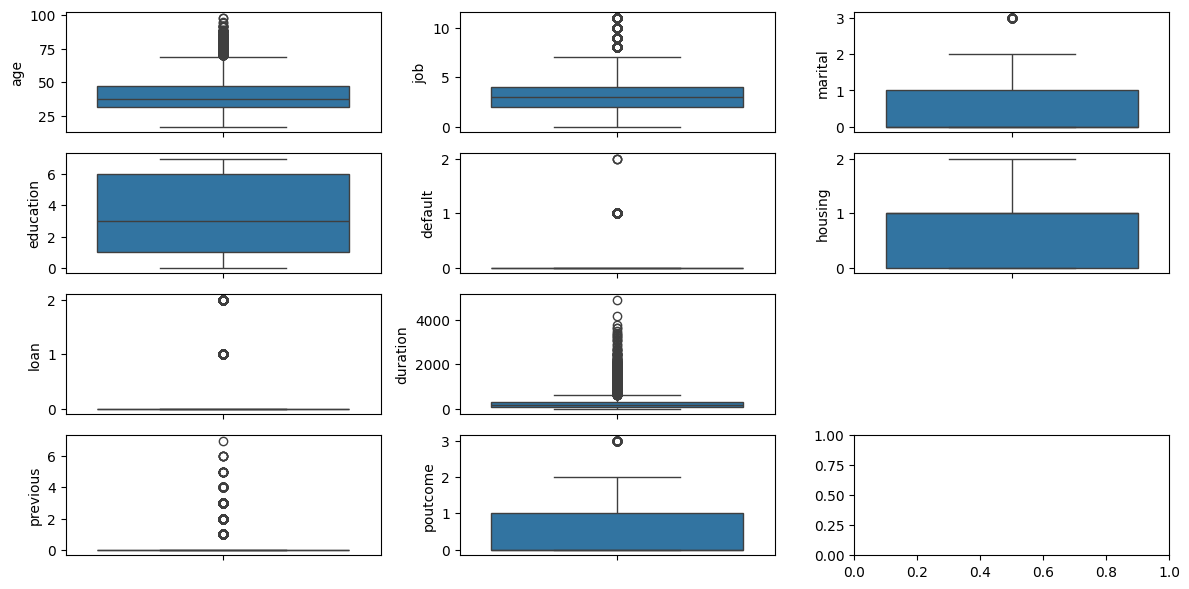

In [24]:
#Valores atípicos
df.describe()



fig, axis = plt.subplots(4, 3, figsize = (12, 6))

sns.boxplot(ax = axis[0, 0], data = df, y = "age")
sns.boxplot(ax = axis[0, 1], data = df, y = "job")
sns.boxplot(ax = axis[0, 2], data = df, y = "marital")
sns.boxplot(ax = axis[1, 0], data = df, y = "education")
sns.boxplot(ax = axis[1, 1], data = df, y = "default")
sns.boxplot(ax = axis[1, 2], data = df, y = "housing")
sns.boxplot(ax = axis[2, 0], data = df, y = "loan")
sns.boxplot(ax = axis[2, 1], data = df, y = "duration")
sns.boxplot(ax = axis[2, 2], data = df, y = "campaign")
sns.boxplot(ax = axis[3, 0], data = df, y = "previous")
sns.boxplot(ax = axis[3, 1], data = df, y = "poutcome")


fig.delaxes(axis[2, 2])
plt.tight_layout()

plt.show()

Tenemos outliers en las siguientes variables:
    -Age
    -Job
    -duration
    -default
    -previous
    -poutcome
    -loan

In [25]:
#AGE

# Calcular el primer cuartil (Q1) y el tercer cuartil (Q3)
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites inferior y superior
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(IQR, 2)}")

Los límites superior e inferior para la búsqueda de outliers son 69.5 y 9.5, con un rango intercuartílico de 15.0


In [26]:
# Definir los límites inferior y superior
lower_limit = Q1 - 3 * IQR
upper_limit = Q3 + 3 * IQR

print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(IQR, 2)}")

Los límites superior e inferior para la búsqueda de outliers son 92.0 y -13.0, con un rango intercuartílico de 15.0


In [27]:
age_altos = df[df["age"] >= 92]
age_altos

age_altos.loan.value_counts()

loan
0    6
1    2
Name: count, dtype: int64

In [28]:
df = df[df["age"] <= 95]  # Mantener solo los valores de "age" menores o iguales a 95


In [29]:
#DEFAULT

# Calcular el primer cuartil (Q1) y el tercer cuartil (Q3)
Q1 = df['default'].quantile(0.25)
Q3 = df['default'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites inferior y superior
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(IQR, 2)}")



Los límites superior e inferior para la búsqueda de outliers son 0.0 y 0.0, con un rango intercuartílico de 0.0


In [30]:
#Revisar si hay valores faltantes
df.isnull().sum().sort_values(ascending=False) 

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
duration          0
campaign          0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [36]:
#ESACALADO

# Min-Max scaler
from sklearn.preprocessing import MinMaxScaler

df["age_n"] = pd.factorize(df["age"])[0]
df["job_n"] = pd.factorize(df["job"])[0]
df["marital_n"] = pd.factorize(df["marital"])[0]
df["education_n"] = pd.factorize(df["education"])[0]
df["default_n"] = pd.factorize(df["default"])[0]
df["housing_n"] = pd.factorize(df["housing"])[0]
df["loan_n"] = pd.factorize(df["loan"])[0]
df["duration_n"] = pd.factorize(df["duration"])[0]
df["campaign_n"] = pd.factorize(df["campaign"])[0]
df["previous_n"] = pd.factorize(df["previous"])[0]
df["poutcome_n"] = pd.factorize(df["poutcome"])[0]
df["emp.var.rate_n"] = pd.factorize(df["emp.var.rate"])[0]
df["cons.price.idx_n"] = pd.factorize(df["cons.price.idx"])[0]
df["euribor3m_n"] = pd.factorize(df["euribor3m"])[0]
df["nr.employed_n"] = pd.factorize(df["nr.employed"])[0]
df["y_n"] = pd.factorize(df["y"])[0]
num_variables = ["job_n", "marital_n", "education_n", "default_n", 
                "housing_n", "loan_n", "poutcome_n",
                 "age", "duration", "campaign", "previous", "emp.var.rate", 
                 "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed"]

scaler = MinMaxScaler()
scal_features = scaler.fit_transform(df[num_variables])
df_scal = pd.DataFrame(scal_features, index = df.index, columns = num_variables)
df_scal.head()











,job_n,marital_n,education_n,default_n,housing_n,loan_n,poutcome_n,age,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.500000,0.053070,0.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735
1,0.090909,0.0,0.142857,0.5,0.0,0.0,0.0,0.512821,0.030297,0.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735
2,0.090909,0.0,0.142857,0.0,0.5,0.0,0.0,0.256410,0.045954,0.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735
3,0.181818,0.0,0.285714,0.0,0.0,0.0,0.0,0.294872,0.030704,0.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735
4,0.090909,0.0,0.142857,0.0,0.0,0.5,0.0,0.500000,0.062424,0.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


# Dividimos el conjunto de datos en muestras de train y test
X = df_scal
y = df["y_n"]

#No se toca la variable objetivo, no se escala, se modifica lo minimo posible, lo factoraizamos porque es categorizar.


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)



X_train.head()
X_test.head()
y_train.head()
y_test.head()

39382    0
30101    1
5382     0
11756    0
20118    0
Name: y_n, dtype: int64

In [41]:
X_test.head()

,job_n,marital_n,education_n,default_n,housing_n,loan_n,poutcome_n,age,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
39382,0.545455,0.000000,0.857143,0.0,1.0,1.0,0.000000,0.217949,0.011590,0.054545,0.0,0.333333,0.455183,0.669456,0.000227,0.170510
30101,0.181818,0.666667,0.857143,0.0,0.0,0.0,0.666667,0.269231,0.073200,0.000000,0.0,0.333333,0.340608,0.154812,0.171843,0.512287
5382,0.090909,0.333333,0.142857,0.0,0.0,0.0,0.333333,0.115385,0.042904,0.054545,0.0,0.937500,0.698753,0.602510,0.957379,0.859735
11756,0.272727,0.000000,0.428571,0.5,0.0,0.0,0.000000,0.307692,0.001627,0.545455,0.0,1.000000,0.882307,0.376569,0.980503,1.000000
20118,0.090909,0.000000,0.142857,0.5,0.5,0.0,0.000000,0.448718,0.020130,0.000000,0.0,1.000000,0.484412,0.615063,0.981864,1.000000


In [42]:
y_train.head()

18119    0
13573    0
18876    0
3315     0
27366    1
Name: y_n, dtype: int64

In [43]:
y_test.head()

39382    0
30101    1
5382     0
11756    0
20118    0
Name: y_n, dtype: int64

In [44]:
from sklearn.feature_selection import f_classif, SelectKBest

#Seleccionamos nuestras caracteristicas
selection_model = SelectKBest(f_classif, k = 10)
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

X_train_sel.head()

,job_n,default_n,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1.000000,0.0,0.126474,0.018182,0.0,1.0000,0.669135,0.338912,0.981410,1.000000
1,0.272727,0.0,0.043514,0.000000,0.0,1.0000,0.669135,0.338912,0.981410,1.000000
2,0.363636,0.0,0.028874,0.018182,0.0,1.0000,0.484412,0.615063,0.982997,1.000000
3,0.181818,0.5,0.069947,0.018182,0.0,0.9375,0.698753,0.602510,0.958059,0.859735
4,0.181818,0.0,0.111631,0.018182,0.0,0.6875,0.389322,0.368201,0.767853,0.877883


In [45]:
X_train_sel["y_n"] = list(y_train)
X_test_sel["y_n"] = list(y_test)
X_train_sel.to_csv("../data/processed/clean_train.csv", index = False)
X_test_sel.to_csv("../data/processed/clean_test.csv", index = False)

train_data = pd.read_csv("../data/processed/clean_train.csv")
test_data = pd.read_csv("../data/processed/clean_test.csv")

train_data.head()

,job_n,default_n,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y_n
0,1.000000,0.0,0.126474,0.018182,0.0,1.0000,0.669135,0.338912,0.981410,1.000000,0
1,0.272727,0.0,0.043514,0.000000,0.0,1.0000,0.669135,0.338912,0.981410,1.000000,0
2,0.363636,0.0,0.028874,0.018182,0.0,1.0000,0.484412,0.615063,0.982997,1.000000,0
3,0.181818,0.5,0.069947,0.018182,0.0,0.9375,0.698753,0.602510,0.958059,0.859735,0
4,0.181818,0.0,0.111631,0.018182,0.0,0.6875,0.389322,0.368201,0.767853,0.877883,1


In [46]:
X_train = train_data.drop(["y_n"], axis = 1)
y_train = train_data["y_n"]
X_test = test_data.drop(["y_n"], axis = 1)
y_test = test_data["y_n"]

In [47]:
# modelado
from sklearn.linear_model import LogisticRegression

# metricas
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# optimizar
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

#Iniciliacióny entrenamiento del modelo

# genera el modelo
model = LogisticRegression()

# entrena
model.fit(X_train, y_train)




LogisticRegression()

In [48]:

y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [49]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.9032532168001942

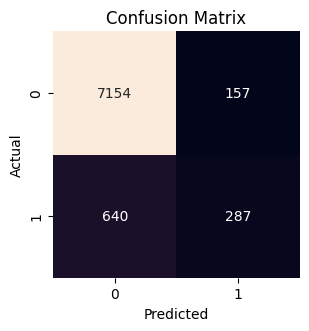

(41186, 33)


In [54]:
Marketing_bancario = confusion_matrix(y_test, y_pred)

# Dibujaremos esta matriz para hacerla más visual
cm_df = pd.DataFrame(Marketing_bancario)

plt.figure(figsize = (3, 3))
sns.heatmap(cm_df, annot=True, fmt="d", cbar=False)

plt.tight_layout()

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print(df.shape)

In [55]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [56]:
# Definimos los parámetros que queremos ajustar a mano
hyperparams = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    "penalty": ["l1", "l2", "elasticnet", None],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
}

# Inicializamos la cuadrícula
grid = GridSearchCV(model, hyperparams, scoring = "accuracy", cv = 5)
grid

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [57]:
grid.fit(X_train, y_train)

print(f"Mejores hiperparámetros: {grid.best_params_}")

Mejores hiperparámetros: {'C': 100, 'penalty': None, 'solver': 'saga'}


In [58]:
model_grid = LogisticRegression(penalty = "l1", C = 1, solver = "liblinear")
model_grid.fit(X_train, y_train)
y_pred = model_grid.predict(X_test)

grid_accuracy = accuracy_score(y_test, y_pred)
grid_accuracy

0.9037387715464918

In [62]:
import numpy as np


# Definimos los parámetros que queremos ajustar
hyperparams = {
    "C": np.logspace(-4, 4, 20),
    "penalty": ["l1", "l2", "elasticnet", None],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
}

# Inicializamos la búsqueda aleatoria
random_search = RandomizedSearchCV(model, hyperparams, n_iter = 100, scoring = "accuracy", cv = 5, random_state = 42)
random_search

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=100,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    None],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   random_state=42, scoring='accuracy')

In [63]:
random_search.fit(X_train, y_train)

print(f"Mejores hiperparámetros: {random_search.best_params_}")

Mejores hiperparámetros: {'solver': 'sag', 'penalty': None, 'C': np.float64(29.763514416313132)}


In [64]:
model_random_search = LogisticRegression(penalty = "l2", C = 29.7635, solver = "lbfgs")
model_random_search.fit(X_train, y_train)
y_pred = model_random_search.predict(X_test)

random_search_accuracy = accuracy_score(y_test, y_pred)
random_search_accuracy

0.9038601602330663